<a href="https://colab.research.google.com/github/victormurcia/CTS_Test/blob/main/EDA_NCT05000840.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 17)

In [ ]:
#Load Patient Dataframe
url = 'https://raw.githubusercontent.com/victormurcia/CTS_Test/main/MDClone/NCT05000840.csv'
cohort = pd.read_csv(url)
cohort

,date of birth,gender at birth,ethnicity,type2_diabetes-age when condition was documented,type2_diabetes-condition documentation date-time,cerebral palsy-condition,multiple sclerosis-condition documentation date-time-days from reference,parkinsons disease-condition documentation date-time-days from reference,ataxia-condition documentation date-time-days from reference,consent-health factor,mdd-condition,schizophrenia-condition,ptsd-condition,bpd-condition
0,1948.333333,Male,Hispanic or Latino,54.751548,2003.083333,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False
1,1934.750000,Male,Hispanic or Latino,85.022821,2019.833333,False,False,False,False,ETHICS-LST CONSENT-PATIENT,False,False,False,False
2,1958.166667,Male,Hispanic or Latino,42.703509,2000.916667,False,False,False,False,ETHICS-LST CONSENT-PATIENT,False,False,False,False
3,1948.833333,Male,Hispanic or Latino,55.289612,2004.166667,False,False,False,False,TDI CONSENT YES,False,False,False,False
4,1969.666667,Female,Hispanic or Latino,48.245048,2017.916667,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48369,1947.916667,Male,Hispanic or Latino,64.757210,2012.750000,False,False,False,False,ETHICS-LST CONSENT-PATIENT,False,False,False,False
48370,1953.666667,Male,Hispanic or Latino,61.311536,2015.000000,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False
48371,1930.750000,Male,Hispanic or Latino,85.160060,2016.000000,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False
48372,1965.083333,Male,Hispanic or Latino,54.601723,2019.750000,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False


In [ ]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48374 entries, 0 to 48373
Data columns (total 14 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   date of birth                                                             48374 non-null  float64
 1   gender at birth                                                           48374 non-null  object 
 2   ethnicity                                                                 48374 non-null  object 
 3   type2_diabetes-age when condition was documented                          48374 non-null  float64
 4   type2_diabetes-condition documentation date-time                          48374 non-null  float64
 5   cerebral palsy-condition                                                  48374 non-null  bool   
 6   multiple sclerosis-condition documentation date-time-days from

In [ ]:
def calculate_null_percentage(df):
    total_rows = df.shape[0]
    null_percentages = df.isnull().sum() / total_rows * 100
    return null_percentages

print('Attribute                                       %Null')
print('-----------------------------------------------------')
calculate_null_percentage(cohort)

Attribute                                       %Null
-----------------------------------------------------


date of birth                                                               0.0
gender at birth                                                             0.0
ethnicity                                                                   0.0
type2_diabetes-age when condition was documented                            0.0
type2_diabetes-condition documentation date-time                            0.0
cerebral palsy-condition                                                    0.0
multiple sclerosis-condition documentation date-time-days from reference    0.0
parkinsons disease-condition documentation date-time-days from reference    0.0
ataxia-condition documentation date-time-days from reference                0.0
consent-health factor                                                       0.0
mdd-condition                                                               0.0
schizophrenia-condition                                                     0.0
ptsd-condition                          

In [ ]:
#Convert year to an integer
cohort['date of birth'] = cohort['date of birth'].round().astype(int)
# Get the current year
current_year = datetime.datetime.now().year
cohort['age'] = current_year - cohort['date of birth']
#Remove patients whose age exceeds 65 or is below 18
cohort = cohort[(cohort['age'] < 65) & (cohort['age'] > 18)].reset_index().drop(['index'], axis=1)
cohort

,date of birth,gender at birth,ethnicity,type2_diabetes-age when condition was documented,type2_diabetes-condition documentation date-time,cerebral palsy-condition,multiple sclerosis-condition documentation date-time-days from reference,parkinsons disease-condition documentation date-time-days from reference,ataxia-condition documentation date-time-days from reference,consent-health factor,mdd-condition,schizophrenia-condition,ptsd-condition,bpd-condition,age
0,1970,Female,Hispanic or Latino,48.245048,2017.916667,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False,53
1,1969,Male,Hispanic or Latino,51.970343,2021.333333,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False,54
2,1961,Male,Hispanic or Latino,40.044403,2000.750000,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False,62
3,1960,Male,Hispanic or Latino,59.881545,2019.416667,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False,63
4,1961,Male,Hispanic or Latino,58.580819,2019.500000,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14262,1966,Female,Hispanic or Latino,48.343224,2014.666667,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False,57
14263,1978,Male,Hispanic or Latino,34.452905,2012.083333,False,False,False,False,ETHICS-LST CONSENT-PATIENT,False,False,False,False,45
14264,1968,Male,Hispanic or Latino,48.002343,2015.916667,False,False,False,False,ETHICS-LST CONSENT-PATIENT,False,False,False,False,55
14265,1965,Male,Hispanic or Latino,54.601723,2019.750000,False,False,False,False,IPVAP/S - CONSENTS TO DOCUMENT,False,False,False,False,58


In [ ]:
# Calculate the percentage of non-False values in each column
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
nf = cohort[nonnumeric_columns].drop('gender at birth',axis=1)
percentage_non_false = (nf == True) | (nf == 'True')
percentage_non_false = percentage_non_false.sum() / len(nf) * 100
print('Attribute                                       %True')
print('-----------------------------------------------------')
print(percentage_non_false)

Attribute                                       %True
-----------------------------------------------------
ethnicity                                                                   0.0
cerebral palsy-condition                                                    0.0
multiple sclerosis-condition documentation date-time-days from reference    0.0
parkinsons disease-condition documentation date-time-days from reference    0.0
ataxia-condition documentation date-time-days from reference                0.0
consent-health factor                                                       0.0
mdd-condition                                                               0.0
schizophrenia-condition                                                     0.0
ptsd-condition                                                              0.0
bpd-condition                                                               0.0
dtype: float64


In [ ]:
def plot_util(df,cols_to_plot,plot_type,figsize=(12,6)):

  # Determine the number of rows and columns for subplots
  num_columns = len(cols_to_plot)
  if num_columns <= 4:
      nrows = 1
      ncols = num_columns
  else:
      nrows = (num_columns + 2) // 3  # Round up to the nearest integer
      ncols = 4

  # Create a grid of plots using Matplotlib's subplots
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  # Flatten the axes array
  axes = axes.ravel()

  # Create a color palette
  colors = sns.color_palette("Set2", n_colors=num_columns)

  # Iterate over numeric columns and create histograms
  for i, column in enumerate(cols_to_plot):
      ax = axes[i]

      #Select plot type:
      if plot_type == 'hist':
        # Plot histogram for the current column with a different color
        sns.histplot(data=df, x=column, kde=True, color=colors[i], ax=ax)
      elif plot_type == 'count':
        # Create count plot for the current column
        sns.countplot(data=df, x=column, color=colors[i], ax=ax)
      
      ax.set_title(column)
      ax.set_ylabel("Counts")

  # Remove any unused subplots
  if num_columns < nrows * ncols:
    for j in range(num_columns, nrows * ncols):
        fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
  return -1

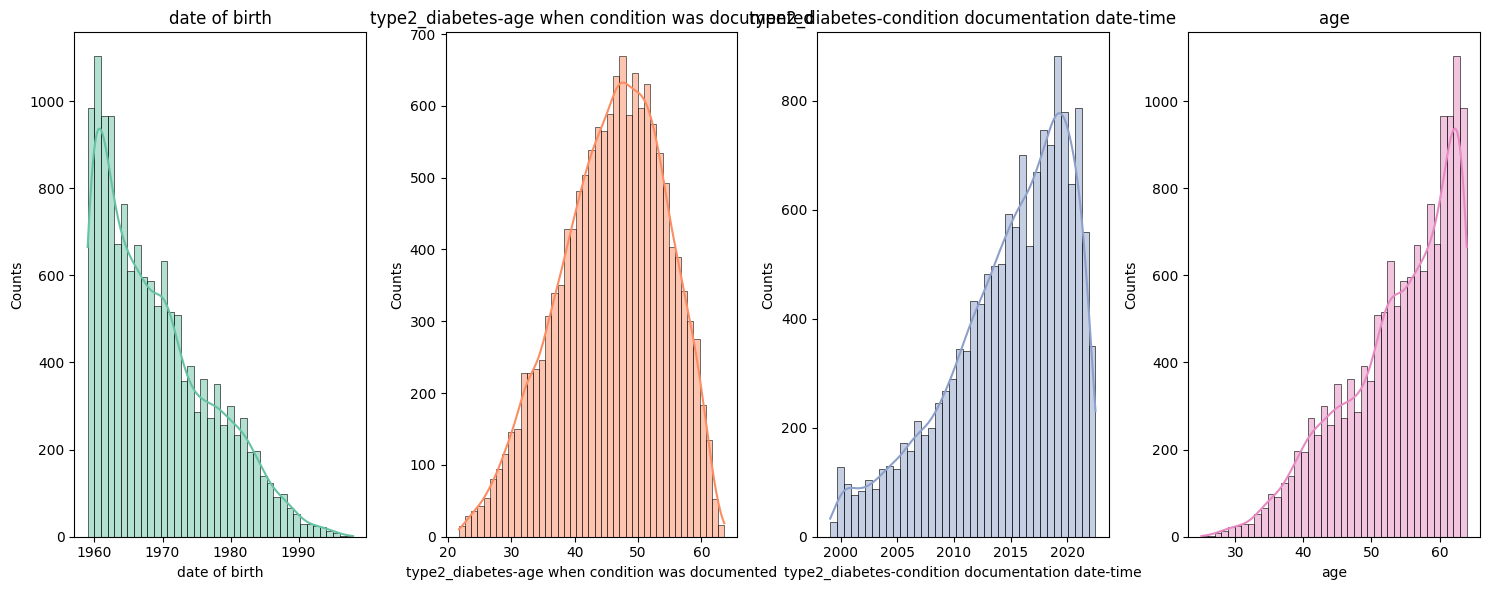

-1

In [ ]:
numeric_cols = cohort.select_dtypes(include=['number']).columns 
plot_util(cohort,numeric_cols,'hist',figsize=(15,6))

In [ ]:
# Calculate descriptive statistics
cols_to_plot = numeric_cols
stats = cohort[cols_to_plot].describe()
stats

,date of birth,type2_diabetes-age when condition was documented,type2_diabetes-condition documentation date-time,age
count,14267.000000,14267.000000,14267.000000,14267.000000
mean,1968.923390,45.902692,2014.834332,54.076610
std,8.099693,8.279092,5.355809,8.099693
min,1959.000000,21.707421,1999.083333,25.000000
25%,1962.000000,40.263425,2011.666667,49.000000
50%,1967.000000,46.598694,2015.916667,56.000000
75%,1974.000000,52.133308,2019.166667,61.000000
max,1998.000000,63.617347,2022.500000,64.000000


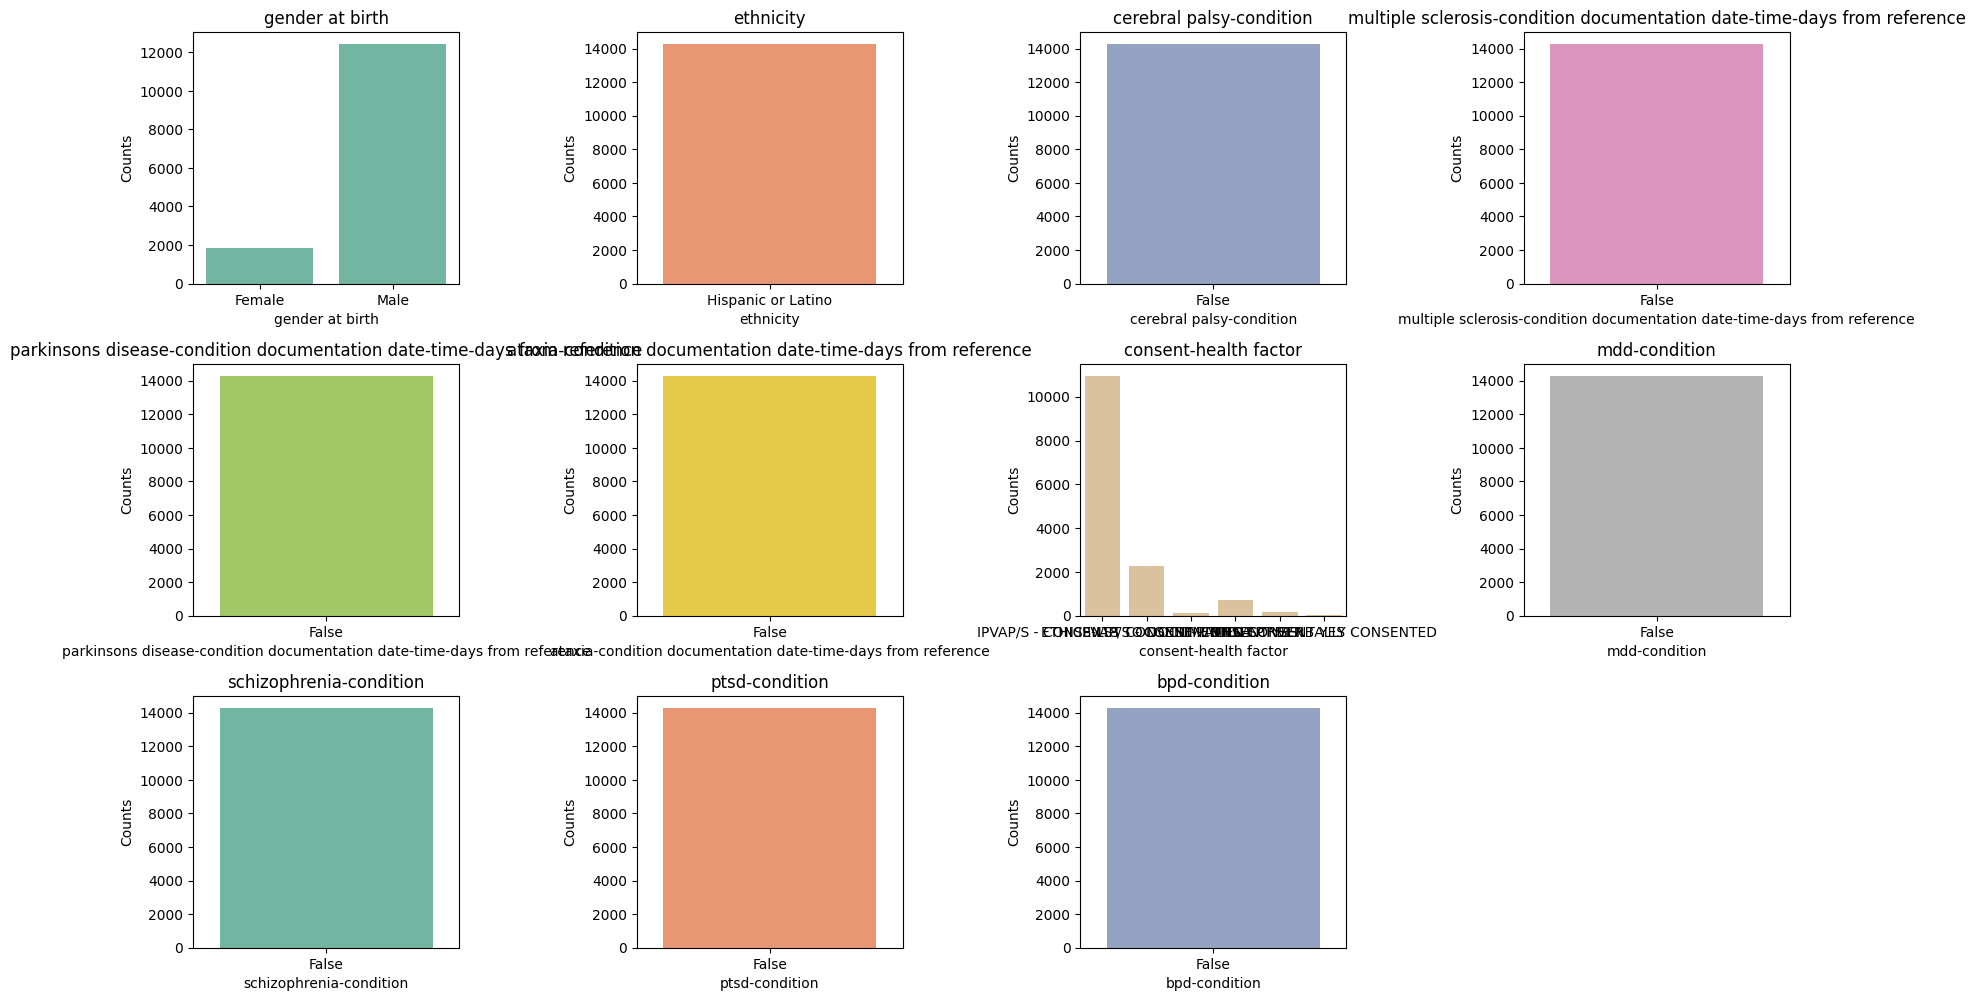

-1

In [ ]:
#nonnumeric_cols = [x for x in cohort.columns if x not in numeric_cols]
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
plot_util(cohort,nonnumeric_columns,'count',figsize=(17,13))

In [ ]:
cohort.select_dtypes(exclude=['number']).columns

Index(['gender at birth', 'ethnicity', 'cerebral palsy-condition',
       'multiple sclerosis-condition documentation date-time-days from reference',
       'parkinsons disease-condition documentation date-time-days from reference',
       'ataxia-condition documentation date-time-days from reference',
       'consent-health factor', 'mdd-condition', 'schizophrenia-condition',
       'ptsd-condition', 'bpd-condition'],
      dtype='object')

In [ ]:
for attribute in nonnumeric_columns:
  print(cohort[attribute].value_counts())

Male      12425
Female     1842
Name: gender at birth, dtype: int64
Hispanic or Latino    14267
Name: ethnicity, dtype: int64
False    14267
Name: cerebral palsy-condition, dtype: int64
False    14267
Name: multiple sclerosis-condition documentation date-time-days from reference, dtype: int64
False    14267
Name: parkinsons disease-condition documentation date-time-days from reference, dtype: int64
False    14267
Name: ataxia-condition documentation date-time-days from reference, dtype: int64
IPVAP/S - CONSENTS TO DOCUMENT    10939
ETHICS-LST CONSENT-PATIENT         2261
TDI CONSENT YES                     723
LTDI CONSENT YES                    187
IPVAP/S - CONSENTS TO SCREEN        118
MRSA PT VERBALLY CONSENTED           39
Name: consent-health factor, dtype: int64
False    14267
Name: mdd-condition, dtype: int64
False    14267
Name: schizophrenia-condition, dtype: int64
False    14267
Name: ptsd-condition, dtype: int64
False    14267
Name: bpd-condition, dtype: int64


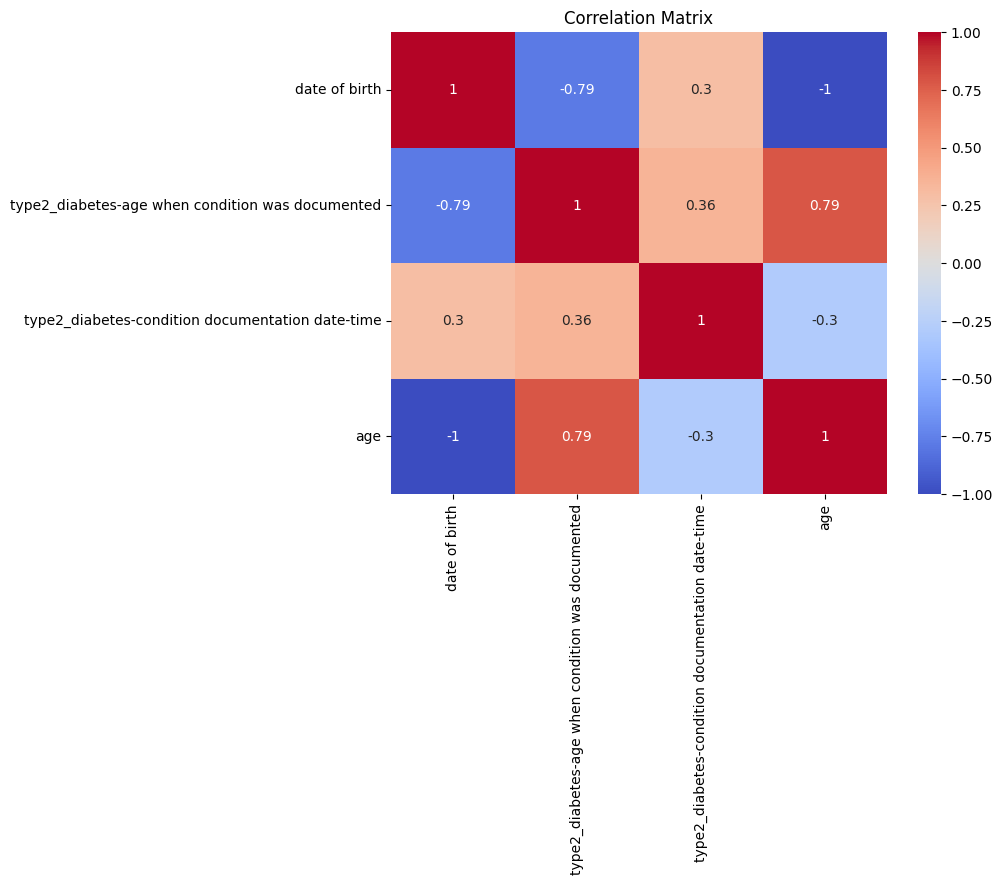

In [ ]:
# Calculate the correlation matrix
corr_matrix = cohort[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()